# Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
  
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # O Mnist é um conjunto de dados de dígitos manuscritos de 0 a 9, 
#                                                                         amplamente utilizado em aprendizado de máquina e visão computacional

# 20x20x1
# Normalização de Dados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Adicionar o canal
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


print(f'Número máximo de pixels: {np.max(x_train[0])}')
print(f'Número mínimo de pixels: {np.min(x_train[0])}')

2025-11-03 19:30:31.384396: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-03 19:30:31.406029: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-03 19:30:32.761526: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-03 19:30:39.872978: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

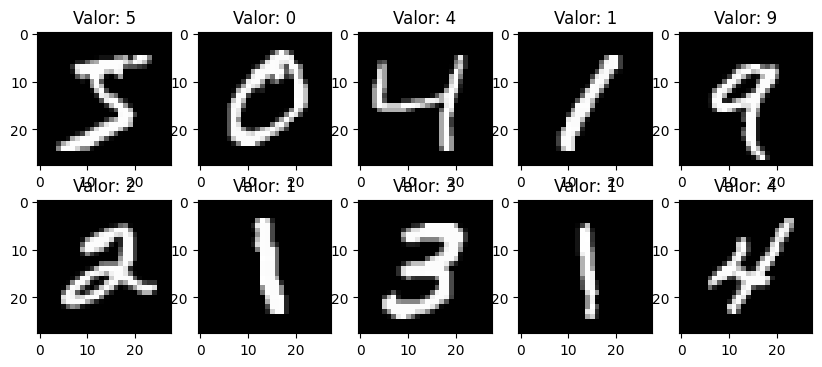

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f'Valor: {y_train[i]}')
plt.show()

# CNN

In [ ]:
model = keras.Sequential([
  keras.Input(shape=(28,28,1)),
  layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ -21s -26325us/step - accuracy: 0.9402 - loss: 0.4454 - val_accuracy: 0.9828 - val_loss: 0.0633
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9809 - loss: 0.0632 - val_accuracy: 0.9802 - val_loss: 0.0671
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9864 - loss: 0.0445 - val_accuracy: 0.9895 - val_loss: 0.0409
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9889 - loss: 0.0349 - val_accuracy: 0.9845 - val_loss: 0.0606
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9912 - loss: 0.0277 - val_accuracy: 0.9897 - val_loss: 0.0555


In [ ]:
score = model.evaluate(x_test, y_test, verbose=8)

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.title('Evolução do Treinamento')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


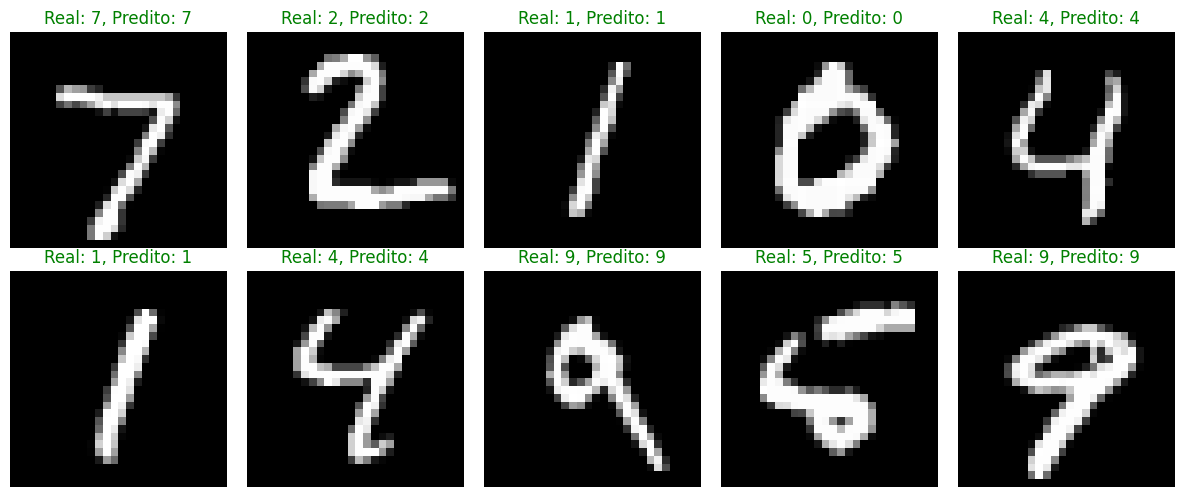

In [41]:
imagens_teste = x_test[:10]
rotulos_reais = y_test[:10]

previsoes = model.predict(imagens_teste)

plt.figure(figsize=(12,5))
for i in range(10):
  ax = plt.subplot(2,5,i+1)
  plt.imshow(imagens_teste[i].reshape(28,28), cmap="gray")

  previsao_digito = np.argmax(previsoes[i])
  real_digito = rotulos_reais[i]

  cor = 'green' if previsao_digito == real_digito else 'red'
  plt.title(f'Real: {real_digito}, Predito: {previsao_digito}', color=cor)
  plt.axis('off')

plt.tight_layout()
plt.show()